count    270.000000
mean      51.251191
std       28.426316
min       -3.467884
25%       25.706843
50%       52.787876
75%       73.755678
max      105.591837
Name: discount, dtype: float64
Correlation: 0.9943365944993799
Regression Model: discount = -0.31 + 1.01 * damages
MAE: 2.38, MSE: 9.09, RMSE: 3.02, R²: 0.9887
Sample Predictions on Test Data:
[90.65197499 76.50272885 94.69461675  4.7458377  91.66263543]


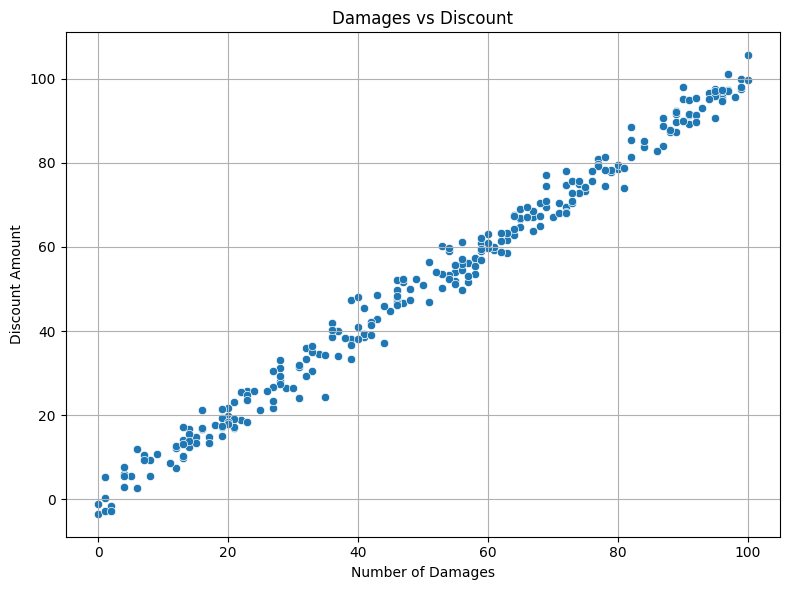

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "housePriceData.csv"
data = pd.read_csv(file_path)

# Separate 10% of the data for testing (unseen data)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# SIMPLE LINEAR REGRESSION SETUP
# Independent variable: damages
# Dependent variable: discount
X_slr = train_data[['damages']]
y_slr = train_data['discount']

# Descriptive statistics of the discount column
print(y_slr.describe())

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_slr['damages'], y=y_slr)
plt.title('Damages vs Discount')
plt.xlabel('Number of Damages')
plt.ylabel('Discount Amount')
plt.grid(True)
plt.tight_layout()
plt.savefig("slr_scatter_plot.png")  # Save plot

# Calculate correlation
correlation = X_slr['damages'].corr(y_slr)
print(f"Correlation: {correlation}")

# Fit Simple Linear Regression model
slr_model = LinearRegression()
slr_model.fit(X_slr, y_slr)

# Model coefficients
slr_intercept = slr_model.intercept_
slr_slope = slr_model.coef_[0]
print(f"Regression Model: discount = {slr_intercept:.2f} + {slr_slope:.2f} * damages")

# Predictions on training data
y_slr_pred_train = slr_model.predict(X_slr)

# Evaluation Metrics
mae = mean_absolute_error(y_slr, y_slr_pred_train)
mse = mean_squared_error(y_slr, y_slr_pred_train)
rmse = mse ** 0.5
r2 = r2_score(y_slr, y_slr_pred_train)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Predict discount on 10% test data
X_slr_test = test_data[['damages']]
y_slr_test_actual = test_data['discount']
y_slr_test_pred = slr_model.predict(X_slr_test)

# Show predictions (optional)
print("Sample Predictions on Test Data:")
print(y_slr_test_pred[:5])


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "housePriceData.csv"
data = pd.read_csv(file_path)

# Separate 10% of the data for testing (unseen data)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# SIMPLE LINEAR REGRESSION SETUP
# Independent variable: damages
# Dependent variable: discount
X_slr = train_data[['damages']]
y_slr = train_data['discount']


# Fit Simple Linear Regression model
slr_model = LinearRegression()
slr_model.fit(X_slr, y_slr)

# Model coefficients
slr_intercept = slr_model.intercept_
slr_slope = slr_model.coef_[0]
print(f"\nRegression Model: \ndiscount = {slr_intercept:.2f} + {slr_slope:.2f} * damages\n")

# Predictions on training data
y_slr_pred_train = slr_model.predict(X_slr)

# Evaluation Metrics
mae = mean_absolute_error(y_slr, y_slr_pred_train)
mse = mean_squared_error(y_slr, y_slr_pred_train)
rmse = mse ** 0.5
r2 = r2_score(y_slr, y_slr_pred_train)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}\n\n")

# Predict discount on 10% test data
X_slr_test = test_data[['damages']]
y_slr_test_actual = test_data['discount']
y_slr_test_pred = slr_model.predict(X_slr_test)


# Predict discount on 10% unseen data
X_slr_test = test_data[['damages']]
y_slr_test_actual = test_data['discount']
y_slr_test_pred = slr_model.predict(X_slr_test)
print("Predictions on Test Data:")
# Combine damage and predicted discount into a DataFrame
predictions_df = pd.DataFrame({
    'Damages': X_slr_test['damages'].values,
    'Predicted_Discount': y_slr_test_pred,
    'Actual_Discount': y_slr_test_actual.values
})

# Show Results
print(predictions_df)



Regression Model: 
discount = -0.31 + 1.01 * damages

MAE: 2.38, MSE: 9.09, RMSE: 3.02, R²: 0.9887


Predictions on Test Data:
    Damages  Predicted_Discount  Actual_Discount
0        90           90.651975        92.887723
1        76           76.502729        79.503415
2        94           94.694617        97.001484
3         5            4.745838         8.746748
4        91           91.662635        89.739520
5       100          100.758579       105.450379
6         4            3.735177         8.655714
7         0           -0.307464        -2.344739
8        15           14.852442         9.805235
9        32           32.033670        37.801828
10       16           15.863103        11.217105
11       64           64.374804        62.600898
12       12           11.820461         9.241139
13       37           37.086972        36.113348
14       93           93.683956        99.435779
15      100          100.758579       103.526616
16       61           61.342822        